# <!-- # from google.colab import auth
# # auth.authenticate_user()

# from google.colab import drive
# drive.mount('/content/gdrive') -->

# # 경로 변경
# cd /content/gdrive/My Drive/AIBM/20191030/

[혈압·혈당 데이터](https://nhiss.nhis.or.kr/bd/ab/bdabf003cv.do)

[연도] 2013~2014년 일반검진 및 생애전환기 건강검진 데이터 1,000,000건
[항목] 연령, 수축기혈압, 이완기혈압, 공복혈당, 성별, 고혈압/당뇨병 진료여부, 체질량지수
[변수]
- BTH_G : 연령(그룹)
- SBP : 수축기혈압
- DBP : 이완기혈압
- FBS : 공복혈당
- SEX : 성별(남성:1, 여성:2)
- DIS : 고혈압/당뇨병 진료여부
고혈압/당뇨병 진료내역 있음: 1
고혈압 진료내역 있음: 2
당뇨병 진료내역 있음: 3
고혈압/당뇨병 진료내역 없음: 4
- BMI : 체질량지수
[파일형식] excel, csv file
※ csv file은 쉼표로 구분한 텍스트 파일로서 워드패드, 통계프로그램(SPSS, SAS 등)에서 조회 가능 합니다.

In [1]:
import pandas as pd
import numpy as np
import os

#os.chdir("C://Users//inhwan//Desktop")

In [2]:
!ls

 1_분포.ipynb
 2_정규변환.ipynb
 3_상관분석.ipynb
'4_주성분분석(PCA).ipynb'
 5_판별분석.ipynb
 99_당뇨질환판별.ipynb
 국가건강검진_혈압혈당데이터.csv
 diabetes_analysis.ipynb
 diabetes_analysis_two_way_anova_20191031.ipynb
 diabetes_analysis_two_way_anova.ipynb
 변수설명_혈압혈당.hwp
'빅데이터에서의_통계_개념_및_활용_강의자료_(최종).pdf'


In [3]:
data = pd.read_csv("국가건강검진_혈압혈당데이터.csv", engine = 'python')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 7 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   SEX     1000000 non-null  int64  
 1   BTH_G   1000000 non-null  int64  
 2   SBP     1000000 non-null  int64  
 3   DBP     1000000 non-null  int64  
 4   FBS     1000000 non-null  int64  
 5   DIS     1000000 non-null  int64  
 6   BMI     1000000 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 53.4 MB


# 데이터 형 변환

In [5]:
convert_dict = {'SEX': object, 
                'BTH_G': object,
                'SBP': int,
                'DBP': int,
                'FBS': int,
                'DIS': object,
                'BMI': float
               } 

In [6]:
data = data.astype(convert_dict)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 7 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   SEX     1000000 non-null  object 
 1   BTH_G   1000000 non-null  object 
 2   SBP     1000000 non-null  int64  
 3   DBP     1000000 non-null  int64  
 4   FBS     1000000 non-null  int64  
 5   DIS     1000000 non-null  object 
 6   BMI     1000000 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 53.4+ MB


## 데이터 범주화 및 y라벨 설정

In [8]:
data = data.drop('DIS', axis = 1)

In [9]:
data['SBP_A'] = data['SBP'].apply(lambda x : 0 if x < 120 else 1 ) # 위험:1 정상:0

In [10]:
data['DBP_A'] = data['DBP'].apply(lambda x : 0 if x < 80 else 1 ) # 위험:1 정상:0

In [11]:
data['FBS_A'] = data['FBS'].apply(lambda x : 0 if x < 126 else 1 ) # 위험:1 정상:0

In [12]:
data['BMI_A'] = data['BMI'].apply(lambda x : 0 if x < 27 else 1 ) # 위험:1 정상:0

In [13]:
data.head()

,SEX,BTH_G,SBP,DBP,FBS,BMI,SBP_A,DBP_A,FBS_A,BMI_A
0,1,1,116,78,94,16.6,0,0,0,0
1,1,1,100,60,79,22.3,0,0,0,0
2,1,1,100,60,87,21.9,0,0,0,0
3,1,1,111,70,72,20.2,0,0,0,0
4,1,1,120,80,98,20.0,1,1,0,0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   SEX     1000000 non-null  object 
 1   BTH_G   1000000 non-null  object 
 2   SBP     1000000 non-null  int64  
 3   DBP     1000000 non-null  int64  
 4   FBS     1000000 non-null  int64  
 5   BMI     1000000 non-null  float64
 6   SBP_A   1000000 non-null  int64  
 7   DBP_A   1000000 non-null  int64  
 8   FBS_A   1000000 non-null  int64  
 9   BMI_A   1000000 non-null  int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 76.3+ MB


In [15]:
data.describe()

,SBP,DBP,FBS,BMI,SBP_A,DBP_A,FBS_A,BMI_A
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,121.871763,75.787874,98.864428,23.804029,0.580822,0.412838,0.070954,0.159461
std,14.561706,9.793411,22.981300,3.297287,0.493425,0.492344,0.256748,0.366106
min,82.000000,50.000000,60.000000,14.800000,0.000000,0.000000,0.000000,0.000000
25%,110.000000,70.000000,87.000000,21.500000,0.000000,0.000000,0.000000,0.000000
50%,120.000000,76.000000,94.000000,23.600000,1.000000,0.000000,0.000000,0.000000
75%,130.000000,80.000000,104.000000,25.800000,1.000000,1.000000,0.000000,0.000000
max,190.000000,120.000000,358.000000,40.300000,1.000000,1.000000,1.000000,1.000000


In [16]:
def healthcheck1 (row):
   if row['FBS_A'] + row['SBP_A'] + row['DBP_A'] + row['BMI_A'] > 1 : # 당뇨 + 고혈압 + 과체중
      return 1
   return 0

In [17]:
def healthcheck2 (row):
   if row['FBS_A'] + row['SBP_A'] + row['DBP_A'] + row['BMI_A'] == 4 : # 당뇨 + 고혈압 + 과체중
      return 4
   if row['FBS_A'] + row['SBP_A'] + row['DBP_A']  == 3 : # 당뇨 + 고혈압
      return 3
   if row['SBP_A'] + row['DBP_A']  == 2 : #고혈압
      return 2
   if row['FBS_A'] == 1 :  # 당뇨
      return 1
   return 0

In [18]:
data['HEALTH1'] = data.apply (lambda row: healthcheck1(row), axis=1)

In [19]:
data['HEALTH2'] = data.apply (lambda row: healthcheck2(row), axis=1)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   SEX      1000000 non-null  object 
 1   BTH_G    1000000 non-null  object 
 2   SBP      1000000 non-null  int64  
 3   DBP      1000000 non-null  int64  
 4   FBS      1000000 non-null  int64  
 5   BMI      1000000 non-null  float64
 6   SBP_A    1000000 non-null  int64  
 7   DBP_A    1000000 non-null  int64  
 8   FBS_A    1000000 non-null  int64  
 9   BMI_A    1000000 non-null  int64  
 10  HEALTH1  1000000 non-null  int64  
 11  HEALTH2  1000000 non-null  int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 91.6+ MB


In [21]:
data.describe()

,SBP,DBP,FBS,BMI,SBP_A,DBP_A,FBS_A,BMI_A,HEALTH1,HEALTH2
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,121.871763,75.787874,98.864428,23.804029,0.580822,0.412838,0.070954,0.159461,0.437213,0.847495
std,14.561706,9.793411,22.981300,3.297287,0.493425,0.492344,0.256748,0.366106,0.496042,1.054204
min,82.000000,50.000000,60.000000,14.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,110.000000,70.000000,87.000000,21.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,120.000000,76.000000,94.000000,23.600000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,130.000000,80.000000,104.000000,25.800000,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000
max,190.000000,120.000000,358.000000,40.300000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [22]:
#data.drop(['SBP','DBP','FBS','BMI'], axis='columns', inplace=True)a

In [23]:
data.head()

,SEX,BTH_G,SBP,DBP,FBS,BMI,SBP_A,DBP_A,FBS_A,BMI_A,HEALTH1,HEALTH2
0,1,1,116,78,94,16.6,0,0,0,0,0,0
1,1,1,100,60,79,22.3,0,0,0,0,0,0
2,1,1,100,60,87,21.9,0,0,0,0,0,0
3,1,1,111,70,72,20.2,0,0,0,0,0,0
4,1,1,120,80,98,20.0,1,1,0,0,1,2


## 데이터 탐색

In [24]:
data.corr()

,SBP,DBP,FBS,BMI,SBP_A,DBP_A,FBS_A,BMI_A,HEALTH1,HEALTH2
SBP,1.000000,0.743006,0.186501,0.304383,0.769181,0.572471,0.126321,0.192597,0.643611,0.615066
DBP,0.743006,1.000000,0.138717,0.275492,0.601981,0.779865,0.081726,0.181975,0.707733,0.724395
FBS,0.186501,0.138717,1.000000,0.173688,0.152862,0.116587,0.743405,0.115887,0.230678,0.324704
BMI,0.304383,0.275492,0.173688,1.000000,0.266686,0.223130,0.114377,0.706824,0.354184,0.260490
SBP_A,0.769181,0.601981,0.152862,0.266686,1.000000,0.586942,0.099817,0.166273,0.715491,0.650084
DBP_A,0.572471,0.779865,0.116587,0.223130,0.586942,1.000000,0.070933,0.151836,0.848350,0.895750
FBS_A,0.126321,0.081726,0.743405,0.114377,0.099817,0.070933,1.000000,0.083413,0.214215,0.354349
BMI_A,0.192597,0.181975,0.115887,0.706824,0.166273,0.151836,0.083413,1.000000,0.329837,0.191609
HEALTH1,0.643611,0.707733,0.230678,0.354184,0.715491,0.848350,0.214215,0.329837,1.000000,0.887900
HEALTH2,0.615066,0.724395,0.324704,0.260490,0.650084,0.895750,0.354349,0.191609,0.887900,1.000000


In [25]:
x_columns = ['SEX','BTH_G','SBP_A','DBP_A','FBS_A','BMI_A', 'HEALTH1']  # 유의한 변수들만 선별(SBP 제외)
data_lr = data[x_columns]

In [26]:
data_lr.head()

,SEX,BTH_G,SBP_A,DBP_A,FBS_A,BMI_A,HEALTH1
0,1,1,0,0,0,0,0
1,1,1,0,0,0,0,0
2,1,1,0,0,0,0,0
3,1,1,0,0,0,0,0
4,1,1,1,1,0,0,1


In [27]:
# 건강 체크
# 0: 정상
# 1: 이상

data['HEALTH1'].value_counts()   #불균형 심함

0    562787
1    437213
Name: HEALTH1, dtype: int64

In [28]:
data_lr.head()

,SEX,BTH_G,SBP_A,DBP_A,FBS_A,BMI_A,HEALTH1
0,1,1,0,0,0,0,0
1,1,1,0,0,0,0,0
2,1,1,0,0,0,0,0
3,1,1,0,0,0,0,0
4,1,1,1,1,0,0,1


In [29]:
data_lr['SEX'].value_counts()

1    510227
2    489773
Name: SEX, dtype: int64

In [30]:
data_lr['BTH_G'].value_counts()

9     53811
16    53382
15    52352
11    50881
10    50787
12    49544
17    47760
14    46373
13    46303
27    45905
18    45048
19    37174
5     34984
20    33846
6     33797
22    32253
21    30824
4     30595
8     30074
7     29666
3     26925
1     26699
25    24530
23    22906
24    22720
2     22398
26    18463
Name: BTH_G, dtype: int64

## data sampling

In [31]:
data_lr['HEALTH1'].value_counts() # 약 7프로만 당뇨 환자

0    562787
1    437213
Name: HEALTH1, dtype: int64

In [32]:
data_sample = data_lr.sample(n=40000, random_state = 1234)

In [33]:
data_sample['HEALTH1'].value_counts() # 약 7프로만 당뇨 환자

0    22557
1    17443
Name: HEALTH1, dtype: int64

# Logistic regression

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

Y = data_sample['HEALTH1']
X = data_sample.iloc[:,0:5]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3)

In [35]:
log_clf = LogisticRegression()

log_clf.fit(X_train, Y_train)
log_clf.score(X_test, Y_test)

0.9649166666666666

# 군집분석

In [36]:
# age blood_pressure bmi fbs diastolic(이완기) dis 를 이용한 군집분석
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [37]:
#data_cluster = data_lr
data_cluster = data.sample(n=10000, random_state = 1234)
#x_columns = ['SEX','BTH_G','DBP','FBS','DIS_1','DIS_2','DIS_3','DIS_4']  # 유의한 변수들만 선별(SBP 제외)
#y_columns = 'diabetes'

In [38]:
data_cluster.head()

,SEX,BTH_G,SBP,DBP,FBS,BMI,SBP_A,DBP_A,FBS_A,BMI_A,HEALTH1,HEALTH2
433572,1,21,128,74,74,19.5,1,0,0,0,0,0
254298,1,13,138,79,81,31.0,1,0,0,1,1,0
686334,2,12,111,63,83,20.8,0,0,0,0,0,0
866486,2,19,143,81,102,24.4,1,1,0,0,1,2
649015,2,10,115,70,78,20.1,0,0,0,0,0,0


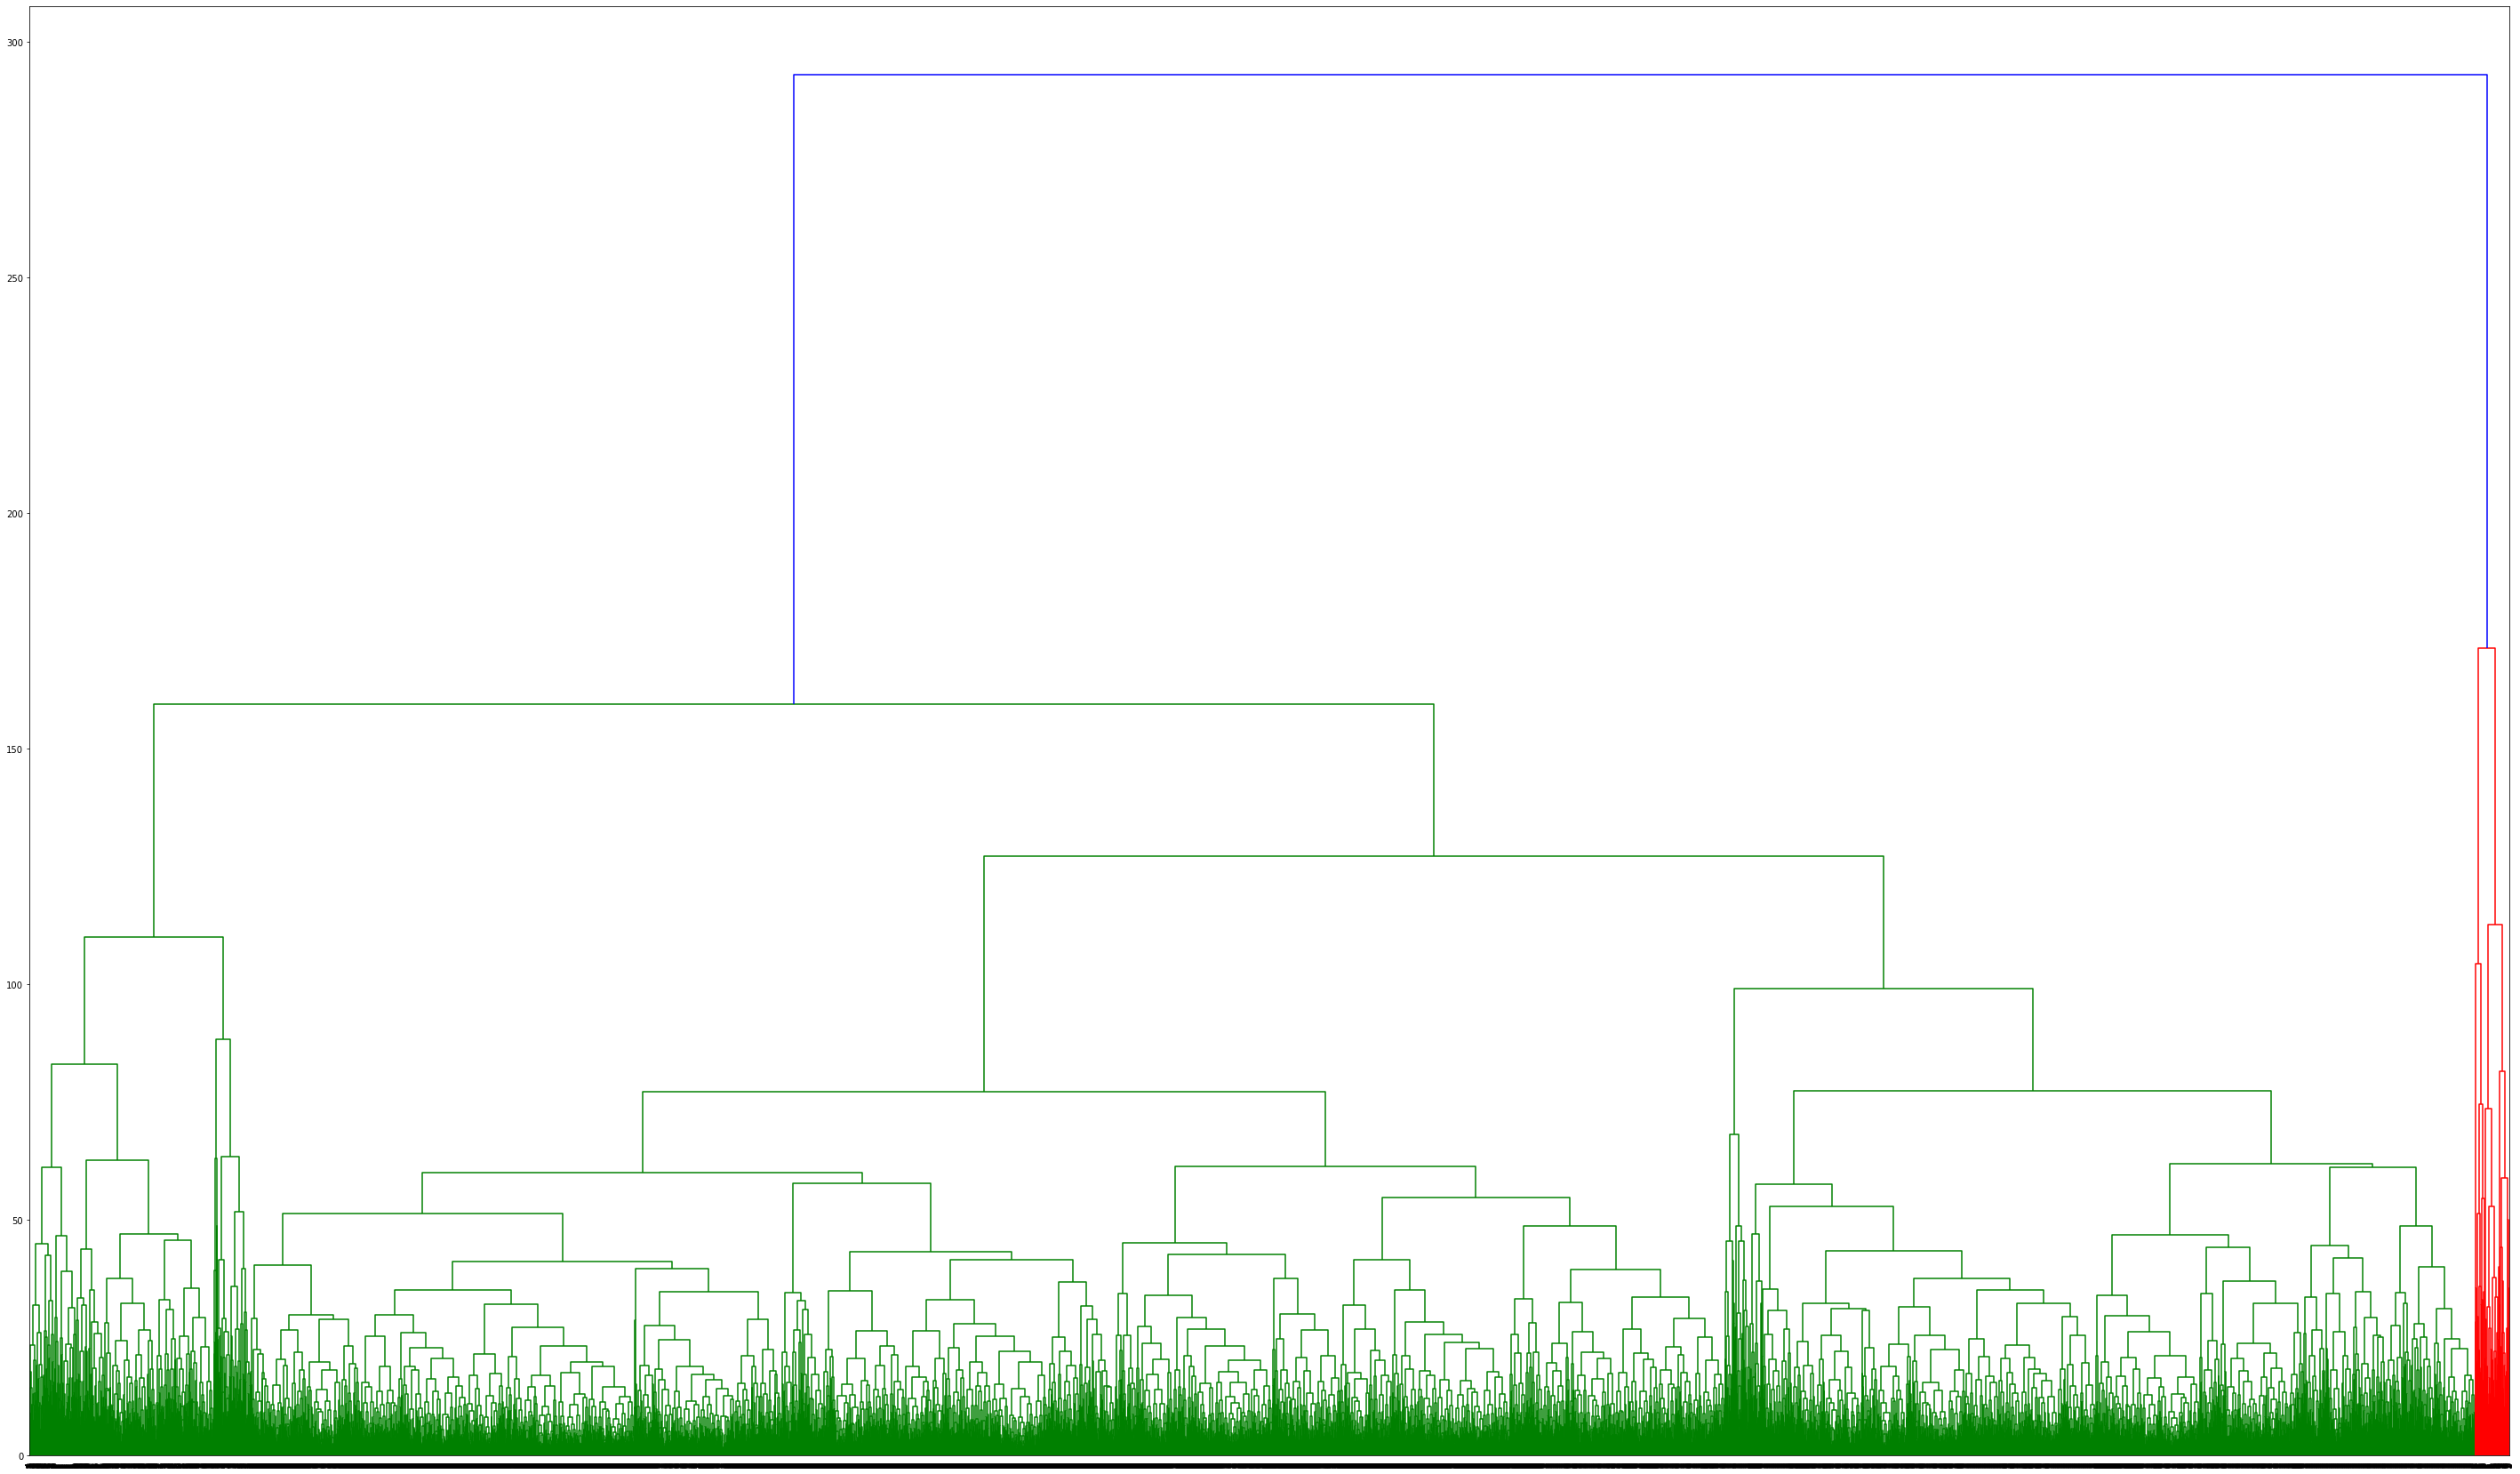

In [39]:
# # dendrogram 

# from scipy.cluster.hierarchy import linkage, dendrogram
# import matplotlib.pyplot as plt

# # Calculate the linkage: mergings
# mergings = linkage(data_cluster,method='complete')

# # Plot the dendrogram, using varieties as labels
# plt.figure(figsize=(50,30))
# dendrogram(mergings,
#            labels = data_cluster['HEALTH1'].to_numpy(),
#            leaf_rotation=90,
#            leaf_font_size=10,
# )
# plt.show()

# dendrogram 

from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(data_cluster,method='complete')

# Plot the dendrogram, using varieties as labels
plt.figure(figsize=(50,30))
dendrogram(mergings,
           labels = data_cluster['HEALTH2'].to_numpy(),
           leaf_rotation=90,
           leaf_font_size=10,
)
plt.show()

# Kmeans

In [40]:
data.head()

,SEX,BTH_G,SBP,DBP,FBS,BMI,SBP_A,DBP_A,FBS_A,BMI_A,HEALTH1,HEALTH2
0,1,1,116,78,94,16.6,0,0,0,0,0,0
1,1,1,100,60,79,22.3,0,0,0,0,0,0
2,1,1,100,60,87,21.9,0,0,0,0,0,0
3,1,1,111,70,72,20.2,0,0,0,0,0,0
4,1,1,120,80,98,20.0,1,1,0,0,1,2


In [41]:
#feature = data_lr[['SEX',	'BTH_G',	'SBP_A',	'DBP_A',	'FBS_A',	'BMI_A']]
feature = data

In [42]:
feature.head()

,SEX,BTH_G,SBP,DBP,FBS,BMI,SBP_A,DBP_A,FBS_A,BMI_A,HEALTH1,HEALTH2
0,1,1,116,78,94,16.6,0,0,0,0,0,0
1,1,1,100,60,79,22.3,0,0,0,0,0,0
2,1,1,100,60,87,21.9,0,0,0,0,0,0
3,1,1,111,70,72,20.2,0,0,0,0,0,0
4,1,1,120,80,98,20.0,1,1,0,0,1,2


In [43]:
len(feature)

1000000

In [44]:
model = KMeans(n_clusters=5,algorithm='auto')

model.fit(feature)  # 모델 학습
predict = pd.DataFrame(model.predict(feature))  # 모델 예측
predict.columns=['cluster_label']

In [45]:
feature.reset_index(drop=True, inplace=True)
predict.reset_index(drop=True, inplace=True)

new_data = pd.concat([feature, predict], axis = 1)
new_data.head()   # 군집 라벨이 추가된 데이터 프레임

,SEX,BTH_G,SBP,DBP,FBS,BMI,SBP_A,DBP_A,FBS_A,BMI_A,HEALTH1,HEALTH2,cluster_label
0,1,1,116,78,94,16.6,0,0,0,0,0,0,1
1,1,1,100,60,79,22.3,0,0,0,0,0,0,4
2,1,1,100,60,87,21.9,0,0,0,0,0,0,4
3,1,1,111,70,72,20.2,0,0,0,0,0,0,4
4,1,1,120,80,98,20.0,1,1,0,0,1,2,1


In [46]:
new_data['cluster_label'].value_counts()

1    406591
4    312799
0    160600
3    104245
2     15765
Name: cluster_label, dtype: int64

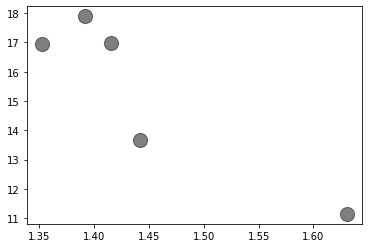

In [47]:
#plot 시각화

centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [48]:
## 군집 별 특성 찾기 

cluster1 = new_data[new_data['cluster_label']==0] 
cluster2 = new_data[new_data['cluster_label']==1] 
cluster3 = new_data[new_data['cluster_label']==2] 
cluster4 = new_data[new_data['cluster_label']==3] 
cluster5 = new_data[new_data['cluster_label']==4] 

### 클러스터별 통계량 추출

In [49]:
def makestat(df):
    print(df.describe())
    print(df.groupby('SEX').count())  # 성별 수 
    print(df.groupby('SEX')['SBP','DBP','FBS','BMI'].mean())  # 성별 SBP DBP FBS BMI 평균
    print(df['SBP_A'].count(), df['DBP_A]'].count(), df['FBS_A'].count(), df['BMI_A'].count())

In [50]:
cluster1.head()
#feature = cluster1[['SEX',	'BTH_G',	'SBP_A',	'DBP_A',	'FBS_A',	'BMI_A']]

,SEX,BTH_G,SBP,DBP,FBS,BMI,SBP_A,DBP_A,FBS_A,BMI_A,HEALTH1,HEALTH2,cluster_label
23,1,1,139,89,86,21.7,1,1,0,0,1,2,0
24,1,1,138,86,95,27.2,1,1,0,1,1,2,0
26,1,1,135,85,114,31.4,1,1,0,1,1,2,0
38,1,1,136,88,88,24.1,1,1,0,0,1,2,0
70,1,1,139,76,102,26.3,1,0,0,0,0,0,0


In [51]:
makestat(cluster1)

                 SBP            DBP            FBS            BMI  \
count  160600.000000  160600.000000  160600.000000  160600.000000   
mean      142.670965      88.065685      99.034608      25.127318   
std        10.055642       8.086738      10.387778       3.363575   
min       119.000000      50.000000      60.000000      14.800000   
25%       136.000000      82.000000      92.000000      22.900000   
50%       140.000000      88.000000      99.000000      24.900000   
75%       149.000000      91.000000     106.000000      27.100000   
max       190.000000     120.000000     151.000000      40.300000   

               SBP_A          DBP_A          FBS_A          BMI_A  \
count  160600.000000  160600.000000  160600.000000  160600.000000   
mean        0.999994       0.907397       0.006650       0.263188   
std         0.002495       0.289876       0.081277       0.440365   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       1.0000

<ipython-input-49-57138f14ee6b>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df.groupby('SEX')['SBP','DBP','FBS','BMI'].mean())  # 성별 SBP DBP FBS BMI 평균


KeyError: 'DBP_A]'

In [ ]:
makestat(cluster2)

In [ ]:
makestat(cluster3)

In [ ]:
makestat(cluster4)

In [ ]:
makestat(cluster5)

In [ ]:
# 건강 체크
# 0: 정상
# 1: 당뇨
# 2: 고혈압,
# 3: 당뇨 + 고혈압
# 4: 당뇨 + 고혈압 + 과체중

In [ ]:
data2 = data.set_index(['HEALTH'])
data2 = data2.loc[1]
#print(df.loc[df['B'].isin(['one','three'])])

# 카이제곱분석

In [ ]:
# H0: 집단간 차이가 없다 vs H1: 집단간 차이 있다

